In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from feature_builder import process_dataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('train.csv')
y_train=x_train[['id','target']]

In [8]:
x_train_features = process_dataset(x_train, text_type=None)
x_train_feat, x_test_feat, y_train_feat, y_test_feat = train_test_split(x_train_features, y_train, test_size = .33, random_state = 17)

In [9]:
rforest = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=4)

rforest.fit(x_train_feat, y_train_feat['target'])

predictions=rforest.predict(x_test_feat)

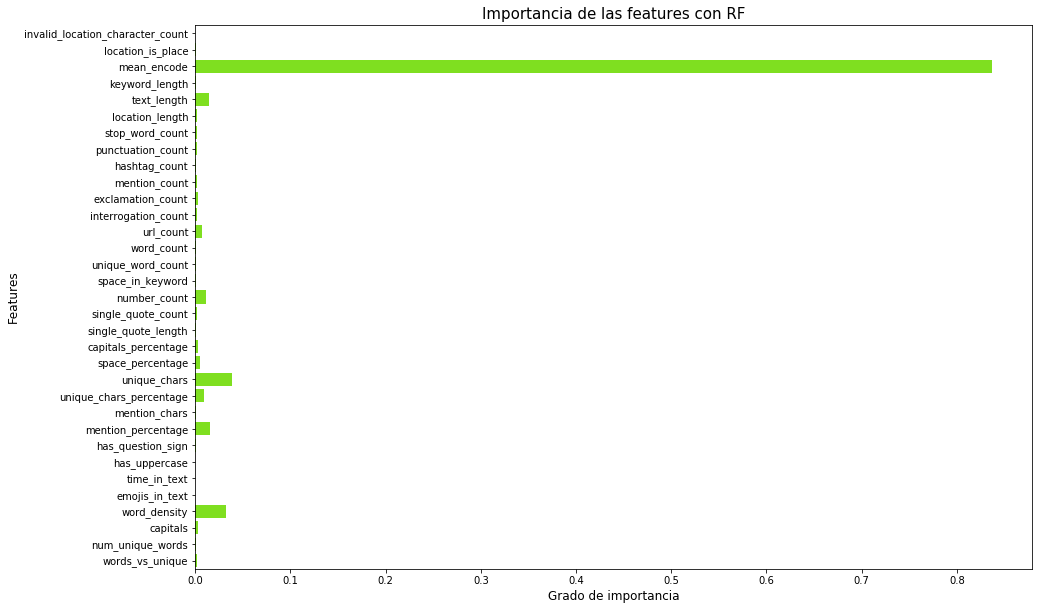

In [10]:
#En clase recomendaron usar RF para feature importance
#En base a estas metricas se puede determinar la importancia de las features para saber su efecto
g = sns.barplot(rforest.feature_importances_, x_train_feat.columns, orient='h', color='chartreuse')
g.set_title("Importancia de las features con RF", fontsize=15)
g.set_xlabel("Grado de importancia", fontsize=12)
g.set_ylabel("Features", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(15, 10)

Correlaciones lineales entre features

In [10]:
limit = 0.95
corr_matrix=x_train_feat.corr().abs()
corr_matrix.head()

,invalid_location_character_count,location_is_place,keyword_length,text_length,location_length,stop_word_count,punctuation_count,hashtag_count,mention_count,exclamation_count,...,unique_chars_percentage,text_in_brackets,mention_chars,mention_percentage,time_in_text,emojis_in_text,word_density,capitals,num_unique_words,words_vs_unique
invalid_location_character_count,1.000000,0.042767,0.000681,0.006972,0.242328,0.017644,0.003184,0.017154,0.006838,0.010475,...,0.004083,0.003602,0.008510,0.001178,0.007415,0.007415,0.005664,0.004371,0.005148,0.018807
location_is_place,0.042767,1.000000,0.051047,0.051861,0.507493,0.000779,0.015151,0.012141,0.014301,0.002150,...,0.037124,0.020009,0.022017,0.009806,0.024909,0.024909,0.040227,0.002225,0.032392,0.005907
keyword_length,0.000681,0.051047,1.000000,0.153458,0.041570,0.016773,0.057228,0.058954,0.000863,0.004536,...,0.148520,0.009146,0.001240,0.035272,0.016011,0.016011,0.154491,0.034325,0.065042,0.013967
text_length,0.006972,0.051861,0.153458,1.000000,0.038824,0.426417,0.479416,0.211403,0.067415,0.030405,...,0.790666,0.026954,0.065755,0.161828,0.056152,0.056152,0.109555,0.284075,0.850731,0.239238
location_length,0.242328,0.507493,0.041570,0.038824,1.000000,0.026753,0.006232,0.004882,0.056568,0.016844,...,0.042248,0.011550,0.062817,0.047694,0.002076,0.002076,0.014977,0.026970,0.039011,0.011984


In [11]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,invalid_location_character_count,location_is_place,keyword_length,text_length,location_length,stop_word_count,punctuation_count,hashtag_count,mention_count,exclamation_count,...,unique_chars_percentage,text_in_brackets,mention_chars,mention_percentage,time_in_text,emojis_in_text,word_density,capitals,num_unique_words,words_vs_unique
invalid_location_character_count,NaN,0.042767,0.000681,0.006972,0.242328,0.017644,0.003184,0.017154,0.006838,0.010475,...,0.004083,0.003602,0.008510,0.001178,0.007415,0.007415,0.005664,0.004371,0.005148,0.018807
location_is_place,NaN,NaN,0.051047,0.051861,0.507493,0.000779,0.015151,0.012141,0.014301,0.002150,...,0.037124,0.020009,0.022017,0.009806,0.024909,0.024909,0.040227,0.002225,0.032392,0.005907
keyword_length,NaN,NaN,NaN,0.153458,0.041570,0.016773,0.057228,0.058954,0.000863,0.004536,...,0.148520,0.009146,0.001240,0.035272,0.016011,0.016011,0.154491,0.034325,0.065042,0.013967
text_length,NaN,NaN,NaN,NaN,0.038824,0.426417,0.479416,0.211403,0.067415,0.030405,...,0.790666,0.026954,0.065755,0.161828,0.056152,0.056152,0.109555,0.284075,0.850731,0.239238
location_length,NaN,NaN,NaN,NaN,NaN,0.026753,0.006232,0.004882,0.056568,0.016844,...,0.042248,0.011550,0.062817,0.047694,0.002076,0.002076,0.014977,0.026970,0.039011,0.011984


In [12]:
linear_combs = [column for column in upper.columns if any(upper[column] > limit)]

In [13]:
print(linear_combs)

['unique_word_count', 'mention_chars', 'emojis_in_text', 'word_density', 'num_unique_words']
